In [2]:
#!/usr/bin/python3.8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks
# import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
# ================= CONSTANTS =================
PMT_PULSE_LENGTH = 1500  # Sample lenght of a typical pulse
SAMPLES_BEFORE_PEAK = 4  # Samples to store before peak detection. MUST BE SMALLER THAN 8

In [4]:
df=pd.read_csv("/home/ivan/cernbox/baseline_t125_s65534_hv2000_ok_split/bckgnd_split.csv", index_col=0)

In [5]:
df

0    1    2    3    4    5    6    7    8    9  ...  5201  5202  \
0      136  136  136  137  137  136  136  136  137  137  ...   136   137   
1      136  136  136  136  135  136  136  136  136  136  ...   136   135   
2      137  136  136  136  136  136  136  136  136  137  ...   136   136   
3      136  136  136  137  135  136  136  136  135  136  ...   136   135   
4      136  136  137  136  137  137  137  136  136  137  ...   136   137   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
65529  135  136  136  136  136  135  136  136  136  136  ...   136   136   
65530  136  135  137  136  137  136  136  136  136  137  ...   137   136   
65531  136  136  136  136  136  136  136  136  136  136  ...   136   136   
65532  136  137  136  136  136  136  136  137  137  136  ...   137   136   
65533  136  136  136  136  136  136  136  136  136  136  ...   135   136   

       5203  5204  5205  5206  5207  5208  5209  5210  
0       136   137   136   136   137   136   137   137  
1       136   136   136   136   136   136   136   136  
2       137   136   136   136   135   136   136   136  
3       136   136   135   136   134   136   136   136  
4       136   137   137   137   136   136   136   136  
...     ...   ...   ...   ...   ...   ...   ...   ...  
65529   135   135   136   136   136   136   136   136  
65530   137   136   136   137   137   136   136   136  
65531   136   136   136   135   136   136   136   136  
65532   137   137   136   136   136   136   136   136  
65533   137   136   136   136   136   136   136   136  

[65534 rows x 5211 columns]

In [19]:
df2=df.iloc[:PMT_PULSE_LENGTH].copy()
df2=(df2-np.mean(df2))/np.std(df2)
df2

TBP:65686  TBP:65707  TBP:65682  TBP:65541  TBP:65631  TBP:66079  \
0     -0.013708  -0.023131  -0.157923  -1.908407   0.128066  -0.135742   
1     -0.013708  -0.023131  -0.157923  -0.710216  -1.178726  -0.135742   
2      0.573770  -0.023131   1.075847  -0.577084  -2.921116   0.781433   
3     -0.601186   0.731135  -0.157923  -0.443952  -3.356713  -0.135742   
4      0.573770   0.731135  -0.157923   0.221710  -2.049921   0.781433   
...         ...        ...        ...        ...        ...        ...   
1495   0.573770  -0.023131  -1.391692   0.487974   0.128066  -0.135742   
1496   0.573770   0.731135  -0.157923   0.621107   0.563663   0.781433   
1497  -0.013708  -0.023131  -1.391692   0.487974   0.128066  -1.052917   
1498   0.573770  -0.023131  -0.157923   0.621107   0.128066  -0.135742   
1499  -0.601186  -0.023131  -0.157923   0.487974   0.128066  -0.135742   

      TBP:65555  TBP:65888  TBP:65550  TBP:65678  ...  TBP:65847  TBP:65976  \
0      0.452700   0.857131  -0.656954   0.118473  ...   0.671910   0.587168   
1      0.452700  -0.107382  -0.481641   0.118473  ...  -0.068079   0.013388   
2      0.452700   0.857131  -0.131017   0.118473  ...  -0.808068   0.587168   
3      0.452700  -0.107382  -0.131017   0.118473  ...  -0.068079   0.013388   
4      0.623702  -0.107382   0.219608   0.594907  ...  -0.068079   0.587168   
...         ...        ...        ...        ...  ...        ...        ...   
1495  -2.283337  -0.107382   0.394920  -0.357961  ...  -0.068079   0.013388   
1496  -1.941332  -0.107382   0.570232   0.118473  ...  -0.068079   0.013388   
1497  -2.112335  -0.107382   0.394920  -0.357961  ...  -0.068079   0.013388   
1498  -2.796344   0.857131   0.394920   0.594907  ...   0.671910   0.013388   
1499  -3.822358  -0.107382   0.394920   0.118473  ...  -0.068079   0.013388   

      TBP:65923  TBP:66150  TBP:68134  TBP:66335  TBP:66112  TBP:66070  \
0      0.554696  -0.013694   0.433437   0.049994   0.914655   0.442621   
1      0.554696  -0.013694   0.433437   0.049994  -0.094898   0.442621   
2      0.620533   0.842202   0.550985   0.049994  -0.094898   0.442621   
3      0.554696  -0.869591   0.433437   0.049994  -0.094898   0.442621   
4      0.620533   0.842202   0.315890   0.737979  -1.104451   0.516342   
...         ...        ...        ...        ...        ...        ...   
1495   0.554696  -0.869591   0.433437   0.049994   0.914655   0.295179   
1496   0.554696  -0.013694   0.433437   0.049994  -0.094898   0.442621   
1497   0.554696  -0.013694   0.433437   0.049994  -0.094898   0.368900   
1498   0.554696   0.842202   0.550985   0.049994   0.914655   0.368900   
1499   0.488860  -0.013694   0.315890   0.049994  -0.094898   0.442621   

      TBP:66130  TBP:69385  
0     -0.016112   0.727834  
1     -0.016112  -0.004885  
2      0.588088  -0.004885  
3     -0.016112  -0.004885  
4     -0.016112  -0.004885  
...         ...        ...  
1495  -0.620313  -0.004885  
1496  -0.016112   0.727834  
1497   0.588088  -0.004885  
1498   0.588088   0.727834  
1499  -0.016112  -0.004885  

[1500 rows x 790 columns]

<IPython.core.display.Javascript object>


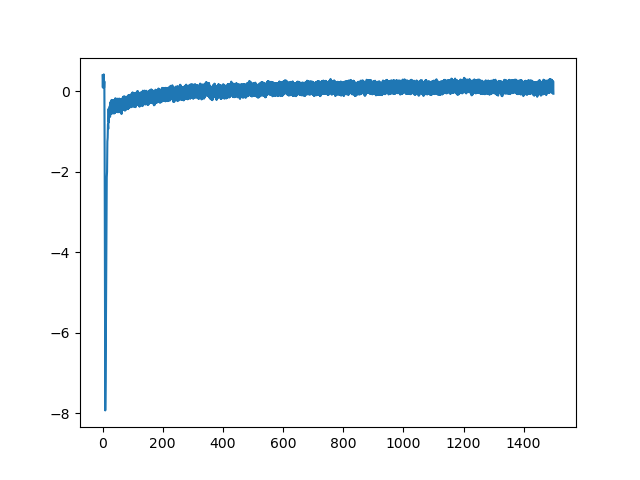

In [6]:
%matplotlib notebook
mod=np.mean(df2.T)
plt.plot(mod)

# FIR Integrated

In [7]:
def pkdetect(x, thr=100, pkh=10):
    peak=[]
    lmax=0
    imax=0
    count=0
    for i in range(1,len(x)):
        if x[i] <= thr:
            pass
        elif x[i] > lmax:
            imax=i
            lmax=x[i]
        elif ((lmax-x[i-1]) > pkh) and (x[i]-x[i-1])>0:
            peak.append(imax)
            lmax=0
        else:
            pass
            
    return peak

In [8]:
thr=1000
pkh=100000
%matplotlib notebook      
pkamp=[]
for c in df.columns[:]:
    x=df[c].to_numpy()
    fir=np.convolve(x,np.flip(mod), "valid")
    intg=np.convolve(fir,np.full(1000,1))
    peak=pkdetect(intg, thr, pkh)
    pkamp=np.append(pkamp,intg[peak])
plt.plot(intg)
plt.plot(peak,intg[peak],".")
plt.show()
# sns.histplot(data=pkamp, kde=True)

KeyboardInterrupt: 

In [ ]:
%matplotlib notebook
# sns.histplot(data=pkamp, kde=True)
plt.hist(pkamp)
plt.show()

In [ ]:
df2=pd.DataFrame(pkamp, columns=["Co60"])
df2.to_csv("../FIR_Integrated_Co60_mod3.csv")
df2

# Only FIR

<IPython.core.display.Javascript object>


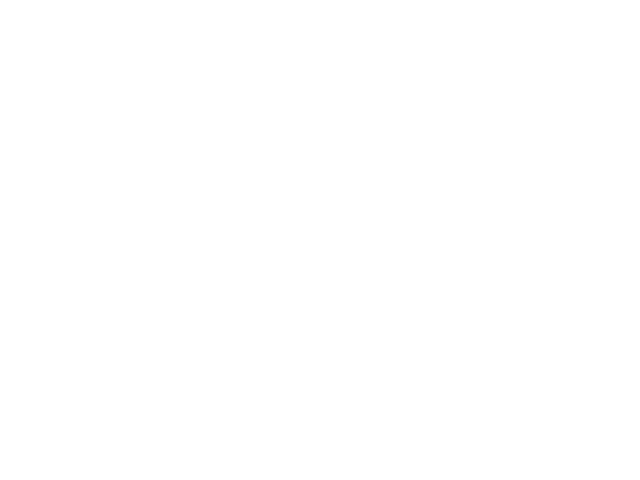

In [13]:
thr=100
pkh=1000
%matplotlib notebook      
pkamp=[]
# for c in df.columns[:10]:
for c in df.columns[:]:
    x=df[c].to_numpy()
    fir=np.convolve(x,np.flip(mod), "valid")
    peak=pkdetect(fir, thr, pkh)
    pkamp=np.append(pkamp,fir[peak])
plt.plot(fir)
plt.plot(peak,fir[peak],".")
plt.plot(x[10:])
plt.plot(peak, x[10:][peak], ".")
# sns.histplot(data=pkamp, kde=True)

In [14]:
df2=pd.DataFrame(pkamp, columns=["Co60"])
df2.to_csv("../FIR_Co60_mod3.csv")
df2

Co60
0        877.152152
1        879.490841
2       9201.530556
3       8611.456360
4       6744.568687
...             ...
157189  5118.787171
157190  4011.369417
157191  4136.388659
157192  3405.485836
157193  3523.288909

[157194 rows x 1 columns]

<IPython.core.display.Javascript object>


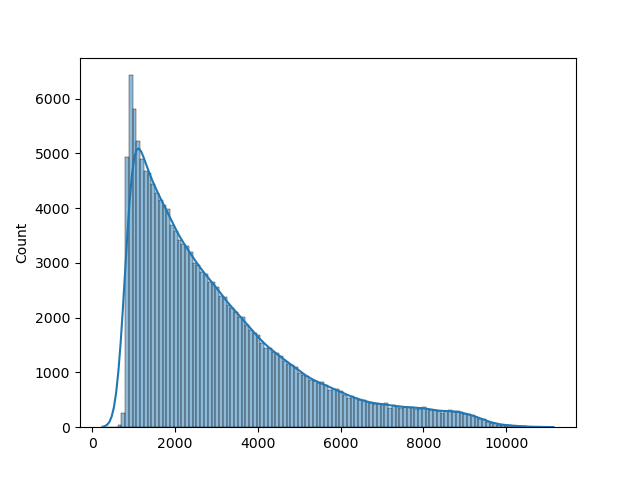

In [15]:
%matplotlib notebook
sns.histplot(data=pkamp, kde=True)
plt.show()

<IPython.core.display.Javascript object>


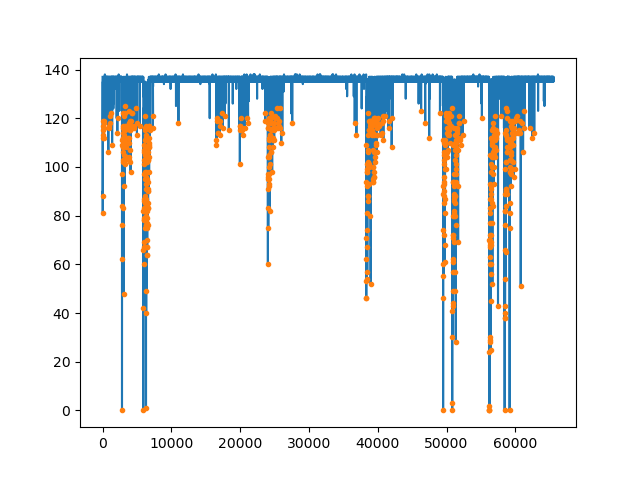

In [9]:
%matplotlib notebook
data=max(x)-x
# plt.plot(data)
xpeak=pkdetect(data,10, 10)
plt.plot(x)
plt.plot(xpeak, x[xpeak],".")
plt.show()

In [17]:
xpeak

[10,
 35,
 51,
 63,
 76,
 81,
 103,
 121,
 127,
 131,
 157,
 189,
 196,
 222,
 228,
 232,
 259,
 277,
 286,
 292,
 301,
 326,
 357,
 367,
 432,
 508,
 1230,
 4586,
 4594,
 4613,
 4622,
 4645,
 4657,
 4669,
 4693,
 4700,
 4749,
 4767,
 4777,
 4817,
 4834,
 4875,
 4916,
 4989,
 5015,
 5263,
 5389,
 5411,
 5433,
 5505,
 5775,
 6643,
 7255,
 11704,
 12177,
 15117,
 15120,
 15124,
 15128,
 15136,
 15141,
 15148,
 15154,
 15163,
 15178,
 15186,
 15190,
 15198,
 15202,
 15209,
 15213,
 15221,
 15231,
 15243,
 15257,
 15271,
 15286,
 15296,
 15306,
 15315,
 15327,
 15334,
 15341,
 15351,
 15358,
 15362,
 15367,
 15377,
 15387,
 15394,
 15408,
 15419,
 15431,
 15443,
 15457,
 15474,
 15487,
 15504,
 15514,
 15525,
 15529,
 15539,
 15555,
 15572,
 15583,
 15596,
 15600,
 15603,
 15609,
 15614,
 15624,
 15645,
 15649,
 15661,
 15671,
 15685,
 15707,
 15730,
 15751,
 15779,
 15782,
 15788,
 15799,
 15826,
 15842,
 15855,
 15867,
 15898,
 15910,
 15923,
 15938,
 15951,
 15979,
 15986,
 15992,
 1600

In [8]:
#Isolating individual pulses within a trace

def isolatePulses(singleTrace, peakIndexesList, pulseLength, samplesBeforePeak):
    singleTrace = singleTrace.tolist()
    i = 0 #Input pulse index
    outputPulseIndex = 0
    diffFromLastPeak = pulseLength #In order to classify the first pulse as a valid event
    isolatedPulses = [] #Output variable (list of pulse samples) that stores each valid pulse
    
    #Be sure to slide along the whole trace, avoiding short pulses located at the end
    while ((i < len(peakIndexesList)) and (peakIndexesList[i] <= len(singleTrace) - pulseLength)):
        #print("Diff from last peak: " + str(diffFromLastPeak))
        if(diffFromLastPeak >= pulseLength):
            lowerPulseRange = peakIndexesList[i] - samplesBeforePeak #Be sure to record some samples before peak
            upperPulseRange = lowerPulseRange + pulseLength #Store the whole pulse
            isolatedPulses.append([])
            isolatedPulses[outputPulseIndex].extend(singleTrace[lowerPulseRange:upperPulseRange])
            #print("OutputPulseIndex: " + str(outputPulseIndex))
            outputPulseIndex += 1
            diffFromLastPeak = 0
        i += 1
        if i < len(peakIndexesList):
            diffFromLastPeak += peakIndexesList[i] - peakIndexesList[i-1] #Check if peaks are distant enough
            
        else:
            break
    
    return isolatedPulses
        

In [9]:
#Isolating individual pulses within a trace using multithreading

def isolatePulsesMP(singleTrace, peakIndexesList, pulseLength, samplesBeforePeak, queue):
    singleTrace = singleTrace.tolist()
    i = 0 #Input pulse index
    outputPulseIndex = 0
    diffFromLastPeak = pulseLength #In order to classify the first pulse as a valid event
    isolatedPulses = [] #Output variable (list of pulse samples) that stores each valid pulse
    
    #Be sure to slide along the whole trace, avoiding short pulses located at the end
    while ((i < len(peakIndexesList)) and (peakIndexesList[i] <= len(singleTrace) - pulseLength)):
        #print("Diff from last peak: " + str(diffFromLastPeak))
        if(diffFromLastPeak >= pulseLength):
            lowerPulseRange = peakIndexesList[i] - samplesBeforePeak #Be sure to record some samples before peak
            upperPulseRange = lowerPulseRange + pulseLength #Store the whole pulse
            isolatedPulses.append([])
            isolatedPulses[outputPulseIndex].extend(singleTrace[lowerPulseRange:upperPulseRange])
            #print("OutputPulseIndex: " + str(outputPulseIndex))
            outputPulseIndex += 1
            diffFromLastPeak = 0
        i += 1
        if i < len(peakIndexesList):
            diffFromLastPeak += peakIndexesList[i] - peakIndexesList[i-1] #Check if peaks are distant enough
            
        else:
            break
        
        queue.put(isolatedPulses[1:])
    
#     return isolatedPulses


In [10]:
#Dataframe with individual pulses
dfPulses = pd.DataFrame(columns = [0])

In [11]:
df[df.columns[1]]

0        136
1        136
2        136
3        136
4        136
        ... 
65529    136
65530    135
65531    136
65532    137
65533    136
Name: 1, Length: 65534, dtype: int64

In [12]:
nPulses = len(df.T)
#Pulses = 10
testList = []
pulseIdx = 0
for i in range(nPulses):
    testList.append([])
    thisTrace = df[df.columns[i]]
    peaksList = pkdetect(thisTrace, 10, 10)
    individualPulses = isolatePulses(thisTrace, peaksList, PMT_PULSE_LENGTH, SAMPLES_BEFORE_PEAK)[1:]
    #print("Individual pulses: " + str(individualPulses))
    print("Processing trace " + str(i + 1) + "/" + str(nPulses))
    for j in individualPulses:
        #print("j: " + str(j))
        dfPulses[pulseIdx] = j
        pulseIdx += 1

Processing trace 1/5211
Processing trace 2/5211
Processing trace 3/5211
Processing trace 4/5211
Processing trace 5/5211
Processing trace 6/5211
Processing trace 7/5211
Processing trace 8/5211
Processing trace 9/5211
Processing trace 10/5211
Processing trace 11/5211
Processing trace 12/5211
Processing trace 13/5211
Processing trace 14/5211
Processing trace 15/5211
Processing trace 16/5211
Processing trace 17/5211
Processing trace 18/5211
Processing trace 19/5211
Processing trace 20/5211
Processing trace 21/5211
Processing trace 22/5211
Processing trace 23/5211
Processing trace 24/5211
Processing trace 25/5211
Processing trace 26/5211
Processing trace 27/5211
Processing trace 28/5211
Processing trace 29/5211
Processing trace 30/5211
Processing trace 31/5211
Processing trace 32/5211
Processing trace 33/5211
Processing trace 34/5211
Processing trace 35/5211
Processing trace 36/5211
Processing trace 37/5211
Processing trace 38/5211
Processing trace 39/5211
Processing trace 40/5211
Processin

Processing trace 321/5211
Processing trace 322/5211
Processing trace 323/5211
Processing trace 324/5211
Processing trace 325/5211
Processing trace 326/5211
Processing trace 327/5211
Processing trace 328/5211
Processing trace 329/5211
Processing trace 330/5211
Processing trace 331/5211
Processing trace 332/5211
Processing trace 333/5211
Processing trace 334/5211
Processing trace 335/5211
Processing trace 336/5211
Processing trace 337/5211
Processing trace 338/5211
Processing trace 339/5211
Processing trace 340/5211
Processing trace 341/5211
Processing trace 342/5211
Processing trace 343/5211
Processing trace 344/5211
Processing trace 345/5211
Processing trace 346/5211
Processing trace 347/5211
Processing trace 348/5211
Processing trace 349/5211
Processing trace 350/5211
Processing trace 351/5211
Processing trace 352/5211
Processing trace 353/5211
Processing trace 354/5211
Processing trace 355/5211
Processing trace 356/5211
Processing trace 357/5211
Processing trace 358/5211
Processing t

Processing trace 637/5211
Processing trace 638/5211
Processing trace 639/5211
Processing trace 640/5211
Processing trace 641/5211
Processing trace 642/5211
Processing trace 643/5211
Processing trace 644/5211
Processing trace 645/5211
Processing trace 646/5211
Processing trace 647/5211
Processing trace 648/5211
Processing trace 649/5211
Processing trace 650/5211
Processing trace 651/5211
Processing trace 652/5211
Processing trace 653/5211
Processing trace 654/5211
Processing trace 655/5211
Processing trace 656/5211
Processing trace 657/5211
Processing trace 658/5211
Processing trace 659/5211
Processing trace 660/5211
Processing trace 661/5211
Processing trace 662/5211
Processing trace 663/5211
Processing trace 664/5211
Processing trace 665/5211
Processing trace 666/5211
Processing trace 667/5211
Processing trace 668/5211
Processing trace 669/5211
Processing trace 670/5211
Processing trace 671/5211
Processing trace 672/5211
Processing trace 673/5211
Processing trace 674/5211
Processing t

Processing trace 953/5211
Processing trace 954/5211
Processing trace 955/5211
Processing trace 956/5211
Processing trace 957/5211
Processing trace 958/5211
Processing trace 959/5211
Processing trace 960/5211
Processing trace 961/5211
Processing trace 962/5211
Processing trace 963/5211
Processing trace 964/5211
Processing trace 965/5211
Processing trace 966/5211
Processing trace 967/5211
Processing trace 968/5211
Processing trace 969/5211
Processing trace 970/5211
Processing trace 971/5211
Processing trace 972/5211
Processing trace 973/5211
Processing trace 974/5211
Processing trace 975/5211
Processing trace 976/5211
Processing trace 977/5211
Processing trace 978/5211
Processing trace 979/5211
Processing trace 980/5211
Processing trace 981/5211
Processing trace 982/5211
Processing trace 983/5211
Processing trace 984/5211
Processing trace 985/5211
Processing trace 986/5211
Processing trace 987/5211
Processing trace 988/5211
Processing trace 989/5211
Processing trace 990/5211
Processing t

Processing trace 1259/5211
Processing trace 1260/5211
Processing trace 1261/5211
Processing trace 1262/5211
Processing trace 1263/5211
Processing trace 1264/5211
Processing trace 1265/5211
Processing trace 1266/5211
Processing trace 1267/5211
Processing trace 1268/5211
Processing trace 1269/5211
Processing trace 1270/5211
Processing trace 1271/5211
Processing trace 1272/5211
Processing trace 1273/5211
Processing trace 1274/5211
Processing trace 1275/5211
Processing trace 1276/5211
Processing trace 1277/5211
Processing trace 1278/5211
Processing trace 1279/5211
Processing trace 1280/5211
Processing trace 1281/5211
Processing trace 1282/5211
Processing trace 1283/5211
Processing trace 1284/5211
Processing trace 1285/5211
Processing trace 1286/5211
Processing trace 1287/5211
Processing trace 1288/5211
Processing trace 1289/5211
Processing trace 1290/5211
Processing trace 1291/5211
Processing trace 1292/5211
Processing trace 1293/5211
Processing trace 1294/5211
Processing trace 1295/5211
P

Processing trace 1563/5211
Processing trace 1564/5211
Processing trace 1565/5211
Processing trace 1566/5211
Processing trace 1567/5211
Processing trace 1568/5211
Processing trace 1569/5211
Processing trace 1570/5211
Processing trace 1571/5211
Processing trace 1572/5211
Processing trace 1573/5211
Processing trace 1574/5211
Processing trace 1575/5211
Processing trace 1576/5211
Processing trace 1577/5211
Processing trace 1578/5211
Processing trace 1579/5211
Processing trace 1580/5211
Processing trace 1581/5211
Processing trace 1582/5211
Processing trace 1583/5211
Processing trace 1584/5211
Processing trace 1585/5211
Processing trace 1586/5211
Processing trace 1587/5211
Processing trace 1588/5211
Processing trace 1589/5211
Processing trace 1590/5211
Processing trace 1591/5211
Processing trace 1592/5211
Processing trace 1593/5211
Processing trace 1594/5211
Processing trace 1595/5211
Processing trace 1596/5211
Processing trace 1597/5211
Processing trace 1598/5211
Processing trace 1599/5211
P

Processing trace 1867/5211
Processing trace 1868/5211
Processing trace 1869/5211
Processing trace 1870/5211
Processing trace 1871/5211
Processing trace 1872/5211
Processing trace 1873/5211
Processing trace 1874/5211
Processing trace 1875/5211
Processing trace 1876/5211
Processing trace 1877/5211
Processing trace 1878/5211
Processing trace 1879/5211
Processing trace 1880/5211
Processing trace 1881/5211
Processing trace 1882/5211
Processing trace 1883/5211
Processing trace 1884/5211
Processing trace 1885/5211
Processing trace 1886/5211
Processing trace 1887/5211
Processing trace 1888/5211
Processing trace 1889/5211
Processing trace 1890/5211
Processing trace 1891/5211
Processing trace 1892/5211
Processing trace 1893/5211
Processing trace 1894/5211
Processing trace 1895/5211
Processing trace 1896/5211
Processing trace 1897/5211
Processing trace 1898/5211
Processing trace 1899/5211
Processing trace 1900/5211
Processing trace 1901/5211
Processing trace 1902/5211
Processing trace 1903/5211
P

Processing trace 2171/5211
Processing trace 2172/5211
Processing trace 2173/5211
Processing trace 2174/5211
Processing trace 2175/5211
Processing trace 2176/5211
Processing trace 2177/5211
Processing trace 2178/5211
Processing trace 2179/5211
Processing trace 2180/5211
Processing trace 2181/5211
Processing trace 2182/5211
Processing trace 2183/5211
Processing trace 2184/5211
Processing trace 2185/5211
Processing trace 2186/5211
Processing trace 2187/5211
Processing trace 2188/5211
Processing trace 2189/5211
Processing trace 2190/5211
Processing trace 2191/5211
Processing trace 2192/5211
Processing trace 2193/5211
Processing trace 2194/5211
Processing trace 2195/5211
Processing trace 2196/5211
Processing trace 2197/5211
Processing trace 2198/5211
Processing trace 2199/5211
Processing trace 2200/5211
Processing trace 2201/5211
Processing trace 2202/5211
Processing trace 2203/5211
Processing trace 2204/5211
Processing trace 2205/5211
Processing trace 2206/5211
Processing trace 2207/5211
P

Processing trace 2475/5211
Processing trace 2476/5211
Processing trace 2477/5211
Processing trace 2478/5211
Processing trace 2479/5211
Processing trace 2480/5211
Processing trace 2481/5211
Processing trace 2482/5211
Processing trace 2483/5211
Processing trace 2484/5211
Processing trace 2485/5211
Processing trace 2486/5211
Processing trace 2487/5211
Processing trace 2488/5211
Processing trace 2489/5211
Processing trace 2490/5211
Processing trace 2491/5211
Processing trace 2492/5211
Processing trace 2493/5211
Processing trace 2494/5211
Processing trace 2495/5211
Processing trace 2496/5211
Processing trace 2497/5211
Processing trace 2498/5211
Processing trace 2499/5211
Processing trace 2500/5211
Processing trace 2501/5211
Processing trace 2502/5211
Processing trace 2503/5211
Processing trace 2504/5211
Processing trace 2505/5211
Processing trace 2506/5211
Processing trace 2507/5211
Processing trace 2508/5211
Processing trace 2509/5211
Processing trace 2510/5211
Processing trace 2511/5211
P

Processing trace 2779/5211
Processing trace 2780/5211
Processing trace 2781/5211
Processing trace 2782/5211
Processing trace 2783/5211
Processing trace 2784/5211
Processing trace 2785/5211
Processing trace 2786/5211
Processing trace 2787/5211
Processing trace 2788/5211
Processing trace 2789/5211
Processing trace 2790/5211
Processing trace 2791/5211
Processing trace 2792/5211
Processing trace 2793/5211
Processing trace 2794/5211
Processing trace 2795/5211
Processing trace 2796/5211
Processing trace 2797/5211
Processing trace 2798/5211
Processing trace 2799/5211
Processing trace 2800/5211
Processing trace 2801/5211
Processing trace 2802/5211
Processing trace 2803/5211
Processing trace 2804/5211
Processing trace 2805/5211
Processing trace 2806/5211
Processing trace 2807/5211
Processing trace 2808/5211
Processing trace 2809/5211
Processing trace 2810/5211
Processing trace 2811/5211
Processing trace 2812/5211
Processing trace 2813/5211
Processing trace 2814/5211
Processing trace 2815/5211
P

Processing trace 3083/5211
Processing trace 3084/5211
Processing trace 3085/5211
Processing trace 3086/5211
Processing trace 3087/5211
Processing trace 3088/5211
Processing trace 3089/5211
Processing trace 3090/5211
Processing trace 3091/5211
Processing trace 3092/5211
Processing trace 3093/5211
Processing trace 3094/5211
Processing trace 3095/5211
Processing trace 3096/5211
Processing trace 3097/5211
Processing trace 3098/5211
Processing trace 3099/5211
Processing trace 3100/5211
Processing trace 3101/5211
Processing trace 3102/5211
Processing trace 3103/5211
Processing trace 3104/5211
Processing trace 3105/5211
Processing trace 3106/5211
Processing trace 3107/5211
Processing trace 3108/5211
Processing trace 3109/5211
Processing trace 3110/5211
Processing trace 3111/5211
Processing trace 3112/5211
Processing trace 3113/5211
Processing trace 3114/5211
Processing trace 3115/5211
Processing trace 3116/5211
Processing trace 3117/5211
Processing trace 3118/5211
Processing trace 3119/5211
P

Processing trace 3387/5211
Processing trace 3388/5211
Processing trace 3389/5211
Processing trace 3390/5211
Processing trace 3391/5211
Processing trace 3392/5211
Processing trace 3393/5211
Processing trace 3394/5211
Processing trace 3395/5211
Processing trace 3396/5211
Processing trace 3397/5211
Processing trace 3398/5211
Processing trace 3399/5211
Processing trace 3400/5211
Processing trace 3401/5211
Processing trace 3402/5211
Processing trace 3403/5211
Processing trace 3404/5211
Processing trace 3405/5211
Processing trace 3406/5211
Processing trace 3407/5211
Processing trace 3408/5211
Processing trace 3409/5211
Processing trace 3410/5211
Processing trace 3411/5211
Processing trace 3412/5211
Processing trace 3413/5211
Processing trace 3414/5211
Processing trace 3415/5211
Processing trace 3416/5211
Processing trace 3417/5211
Processing trace 3418/5211
Processing trace 3419/5211
Processing trace 3420/5211
Processing trace 3421/5211
Processing trace 3422/5211
Processing trace 3423/5211
P

Processing trace 3691/5211
Processing trace 3692/5211
Processing trace 3693/5211
Processing trace 3694/5211
Processing trace 3695/5211
Processing trace 3696/5211
Processing trace 3697/5211
Processing trace 3698/5211
Processing trace 3699/5211
Processing trace 3700/5211
Processing trace 3701/5211
Processing trace 3702/5211
Processing trace 3703/5211
Processing trace 3704/5211
Processing trace 3705/5211
Processing trace 3706/5211
Processing trace 3707/5211
Processing trace 3708/5211
Processing trace 3709/5211
Processing trace 3710/5211
Processing trace 3711/5211
Processing trace 3712/5211
Processing trace 3713/5211
Processing trace 3714/5211
Processing trace 3715/5211
Processing trace 3716/5211
Processing trace 3717/5211
Processing trace 3718/5211
Processing trace 3719/5211
Processing trace 3720/5211
Processing trace 3721/5211
Processing trace 3722/5211
Processing trace 3723/5211
Processing trace 3724/5211
Processing trace 3725/5211
Processing trace 3726/5211
Processing trace 3727/5211
P

Processing trace 3995/5211
Processing trace 3996/5211
Processing trace 3997/5211
Processing trace 3998/5211
Processing trace 3999/5211
Processing trace 4000/5211
Processing trace 4001/5211
Processing trace 4002/5211
Processing trace 4003/5211
Processing trace 4004/5211
Processing trace 4005/5211
Processing trace 4006/5211
Processing trace 4007/5211
Processing trace 4008/5211
Processing trace 4009/5211
Processing trace 4010/5211
Processing trace 4011/5211
Processing trace 4012/5211
Processing trace 4013/5211
Processing trace 4014/5211
Processing trace 4015/5211
Processing trace 4016/5211
Processing trace 4017/5211
Processing trace 4018/5211
Processing trace 4019/5211
Processing trace 4020/5211
Processing trace 4021/5211
Processing trace 4022/5211
Processing trace 4023/5211
Processing trace 4024/5211
Processing trace 4025/5211
Processing trace 4026/5211
Processing trace 4027/5211
Processing trace 4028/5211
Processing trace 4029/5211
Processing trace 4030/5211
Processing trace 4031/5211
P

Processing trace 4299/5211
Processing trace 4300/5211
Processing trace 4301/5211
Processing trace 4302/5211
Processing trace 4303/5211
Processing trace 4304/5211
Processing trace 4305/5211
Processing trace 4306/5211
Processing trace 4307/5211
Processing trace 4308/5211
Processing trace 4309/5211
Processing trace 4310/5211
Processing trace 4311/5211
Processing trace 4312/5211
Processing trace 4313/5211
Processing trace 4314/5211
Processing trace 4315/5211
Processing trace 4316/5211
Processing trace 4317/5211
Processing trace 4318/5211
Processing trace 4319/5211
Processing trace 4320/5211
Processing trace 4321/5211
Processing trace 4322/5211
Processing trace 4323/5211
Processing trace 4324/5211
Processing trace 4325/5211
Processing trace 4326/5211
Processing trace 4327/5211
Processing trace 4328/5211
Processing trace 4329/5211
Processing trace 4330/5211
Processing trace 4331/5211
Processing trace 4332/5211
Processing trace 4333/5211
Processing trace 4334/5211
Processing trace 4335/5211
P

Processing trace 4603/5211
Processing trace 4604/5211
Processing trace 4605/5211
Processing trace 4606/5211
Processing trace 4607/5211
Processing trace 4608/5211
Processing trace 4609/5211
Processing trace 4610/5211
Processing trace 4611/5211
Processing trace 4612/5211
Processing trace 4613/5211
Processing trace 4614/5211
Processing trace 4615/5211
Processing trace 4616/5211
Processing trace 4617/5211
Processing trace 4618/5211
Processing trace 4619/5211
Processing trace 4620/5211
Processing trace 4621/5211
Processing trace 4622/5211
Processing trace 4623/5211
Processing trace 4624/5211
Processing trace 4625/5211
Processing trace 4626/5211
Processing trace 4627/5211
Processing trace 4628/5211
Processing trace 4629/5211
Processing trace 4630/5211
Processing trace 4631/5211
Processing trace 4632/5211
Processing trace 4633/5211
Processing trace 4634/5211
Processing trace 4635/5211
Processing trace 4636/5211
Processing trace 4637/5211
Processing trace 4638/5211
Processing trace 4639/5211
P

Processing trace 4907/5211
Processing trace 4908/5211
Processing trace 4909/5211
Processing trace 4910/5211
Processing trace 4911/5211
Processing trace 4912/5211
Processing trace 4913/5211
Processing trace 4914/5211
Processing trace 4915/5211
Processing trace 4916/5211
Processing trace 4917/5211
Processing trace 4918/5211
Processing trace 4919/5211
Processing trace 4920/5211
Processing trace 4921/5211
Processing trace 4922/5211
Processing trace 4923/5211
Processing trace 4924/5211
Processing trace 4925/5211
Processing trace 4926/5211
Processing trace 4927/5211
Processing trace 4928/5211
Processing trace 4929/5211
Processing trace 4930/5211
Processing trace 4931/5211
Processing trace 4932/5211
Processing trace 4933/5211
Processing trace 4934/5211
Processing trace 4935/5211
Processing trace 4936/5211
Processing trace 4937/5211
Processing trace 4938/5211
Processing trace 4939/5211
Processing trace 4940/5211
Processing trace 4941/5211
Processing trace 4942/5211
Processing trace 4943/5211
P

Processing trace 5211/5211


In [23]:
dfPulses

0     1     2     3     4     5     6     7     8     9     ...  5983  \
0      135   137   136   137   125   136   137   137   135   136  ...   136   
1      136   136   135   136   130   136   136   136   135   136  ...   135   
2      136   136   135   136   128   136   136   137   136   136  ...   136   
3      136   135   136   136   132   136   136   136   135   136  ...   136   
4      137   138   137   138   134   137   138   138   137   137  ...   138   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1495   136   136   136   136   136   136   136   135   136   136  ...   135   
1496   137   136   137   137   137   136   135   137   133   136  ...   137   
1497   136   137   136   136   136   136   136   135   124   136  ...   135   
1498   136   137   137   136   137   137   136   136   123   137  ...   136   
1499   136   136   136   136   136   136   136   135   127   136  ...   135   

      5984  5985  5986  5987  5988  5989  5990  5991  5992  
0      136   137   136   136   136   136   137   125   137  
1      135   136   136   136   135   136   136   127   136  
2      136   136   136   136   136   136   137   129   136  
3      135   136   136   136   135   136   136   132   135  
4      137   138   137   138   137   138   138   135   138  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1495   136   135   136   136   136   136   136   136   136  
1496   137   137   136   137   137   137   136   137   137  
1497   136   136   137   136   135   136   135   136   136  
1498   136   136   137   136   136   136   136   137   137  
1499   135   135   136   136   136   136   136   136   136  

[1500 rows x 5993 columns]

In [34]:
dfPulses.to_csv("../PeakDetection_Baseline_IndividualPulses2kV.csv")

<IPython.core.display.Javascript object>


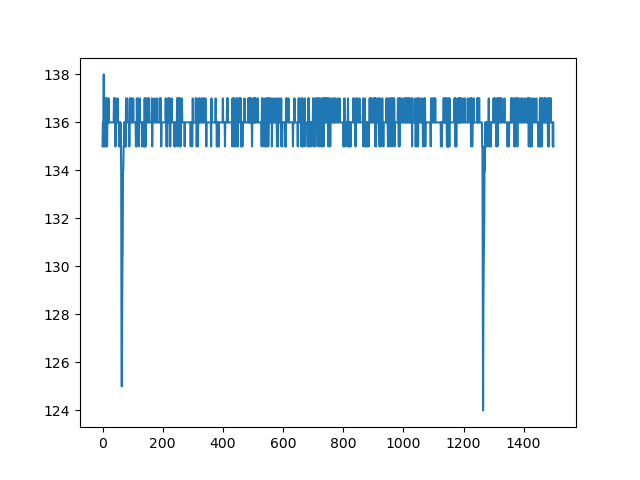

In [26]:
%matplotlib notebook

nPlots = 1
startIndex = 2000


ax = plt.plot(dfPulses[dfPulses.columns[startIndex]])

for i in range(nPlots - 1):
    plt.plot(dfPulses[dfPulses.columns[startIndex + 1 + i]])
    plt.plot()

In [27]:
def singlePulseToArea(singlePulse):
    newPulse = max(singlePulse) - singlePulse
    return sum(newPulse)

In [28]:
dfAreas = pd.DataFrame(columns = ["Baseline"])

In [29]:
dfAreas["Baseline"] = dfPulses.apply(singlePulseToArea, axis = 0)

In [30]:
dfAreas

Baseline
0         2936
1         2709
2         3653
3         2674
4         9357
...        ...
5988      1587
5989      2880
5990      2811
5991      3147
5992      2880

[5993 rows x 1 columns]

In [33]:
dfAreas.to_csv("../PeakDetection_Baseline_Areas2kV.csv")

<IPython.core.display.Javascript object>


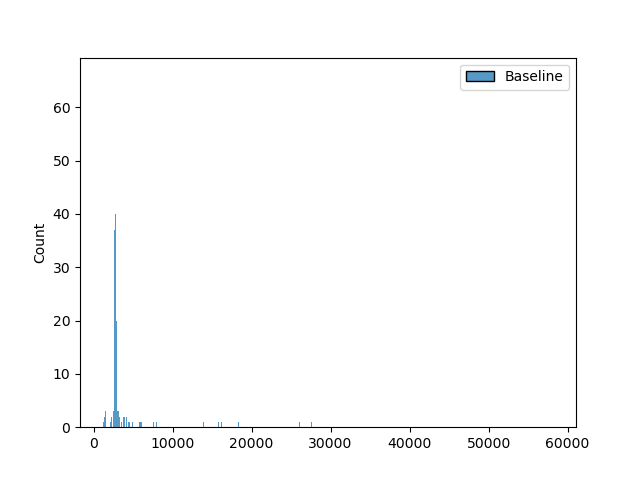

In [32]:
%matplotlib notebook
sns.histplot(dfAreas, bins = 17500)
plt.show()

In [ ]:
%matplotlib notebook
dfMax = max(dfPulses[dfPulses.columns[0]])
dfNew = dfMax - dfPulses[dfPulses.columns[0]]
plt.plot(dfNew)
plt.show()